## Notas - Capítulo 1

### Qué es BERT?

Bidirectional Encoder Representations from Transformers -> BERT

| Modelo | Tamaño | Velocidad | Precisión | Técnica | Arquitectura |
|-|-|-|-|-|-|
| BERT | 110M Parámetros | Base | Base | Base | 12 capas (transformers) |
| DistilBERT | 66M Parámetros (40% menos) | 60% más rápido que BERT | 97% de presición | Transfiere por "Knowledge distillation | 6 capas (transformers) |

Datasets -> Tokenizers -> Transformers -> Datasets

### Apache Arrow

Apache Arrow es un formato de columna en memoria y un conjunto de herramientas diseñado para facilitar el procesamiento eficiente de datos, especialmente en entornos analíticos y de big data.

Ventajas:
* Un formato estándar de datos en memoria, orientado a columnas.
* Interoperabilidad entre lenguajes, sin necesidad de conversión de datos.
* Altísimo rendimiento para tareas de análisis, gracias al procesamiento vectorizado y uso eficiente e CPU y memoria.

Por ejemplo, si se convierte un DataFrame de pandas a PySpark (o viceversa), si ambos usan Arrow, no se copian ni transforman los datos fila por fila, solo se comparten en memoria, acelerando el proceso.

## Código

In [1]:
from transformers import AutoTokenizer
from transformers import TrainingArguments
from transformers import Trainer
from transformers import AutoModelForSequenceClassification
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import torch
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"

use_cpu = False

2025-06-08 13:05:23.616842: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-08 13:05:23.790197: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749409523.858926   10242 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749409523.879310   10242 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749409524.154393   10242 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749409524.154448   10242 computation_placer.cc:177] computation placer already registered. Please che

In [2]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [ ]:
def tokenize(batch):
    breakpoint()
    return tokenizer(batch["text"], padding=True, truncation=True)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {
        "accuracy": acc,
        "f1": f1,
    }

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

In [ ]:
# Load the dataset
emotions = load_dataset("emotion")

# Tokenize the dataset
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

## Prácticas

In [32]:
print(type(emotions))
emotions.set_format(type="pandas")
df = emotions["train"][:]
print(type(df))

<class 'datasets.dataset_dict.DatasetDict'>
<class 'pandas.core.frame.DataFrame'>


In [26]:
print(type(emotions))
emotions

<class 'datasets.dataset_dict.DatasetDict'>


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [25]:
print(type(emotions["train"]))
emotions["train"].column_names

<class 'datasets.arrow_dataset.Dataset'>


['text', 'label']

In [23]:
x = emotions["train"]["text"]
print(type(x))
x

<class 'list'>


['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel as confused about life as a teenager or as jaded as a year old man',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirst

In [5]:
# Print first 5 emotions
print(emotions["train"][:5])

# Print first 5 emotions_encoded
print(emotions_encoded["train"][:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}
{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3], 'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1

In [6]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [8]:
emotions_encoded["train"]

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 16000
})

## Original code

In [ ]:

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_ckpt = "distilbert-base-uncased"
model_name = f"{model_ckpt}-finetuned-emotion"

training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  use_cpu=use_cpu,
                                  log_level="error")

num_labels = 6
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to("cpu"))

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)

trainer.train()

/tmp/ipykernel_45239/1931756710.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=training_args,


Step,Training Loss
250,0.828500
500,0.250500


TrainOutput(global_step=500, training_loss=0.5395275268554688, metrics={'train_runtime': 2006.6784, 'train_samples_per_second': 15.947, 'train_steps_per_second': 0.249, 'total_flos': 720342861696000.0, 'train_loss': 0.5395275268554688, 'epoch': 2.0})

In [ ]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [ ]:
preds_output.metrics

{'test_loss': 0.2045675814151764,
 'test_accuracy': 0.923,
 'test_f1': 0.9230927566782218,
 'test_runtime': 1.9901,
 'test_samples_per_second': 1004.966,
 'test_steps_per_second': 16.079}

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis=1)

y_valid = np.array(emotions_encoded["validation"]["label"])

labels = emotions["train"].features["label"].names

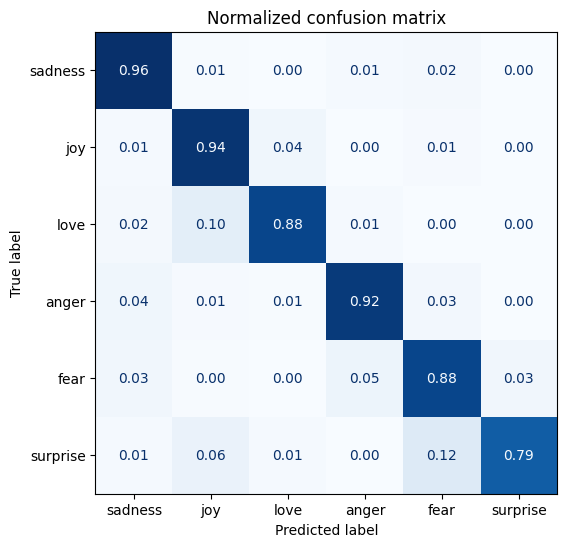

In [ ]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [ ]:
from torch.nn.functional import softmax

textos_prueba = [
    "I love the basketball court, but I don't like that it's unpainted, but I would definitely go back.",
    "I'm feeling really down today.",
    "This movie was absolutely hilarious!",
    "I have no opinion about the event.",
]

inputs = tokenizer(textos_prueba, return_tensors="pt", padding=True, truncation=True)

device = model.device
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    probs = softmax(logits, dim=-1)
    predicted_class_ids = torch.argmax(probs, dim=-1)

label_names = emotions_encoded["train"].features["label"].names

for texto, class_id, prob in zip(textos_prueba, predicted_class_ids, probs):
    predicted_label = label_names[class_id.item()]
    confidence = prob[class_id].item()
    print(f"Texto: {texto}")
    print(f"→ Predicción: {predicted_label} (Confianza: {confidence:.4f})\n")

for i, texto in enumerate(textos_prueba):
    print(f"Texto: {texto}")
    for j, label in enumerate(label_names):
        print(f"  {label:12}: {probs[i][j].item():.4f}")
    print()

Texto: I love the basketball court, but I don't like that it's unpainted, but I would definitely go back.
→ Predicción: sadness (Confianza: 0.8080)

Texto: I'm feeling really down today.
→ Predicción: sadness (Confianza: 0.9744)

Texto: This movie was absolutely hilarious!
→ Predicción: joy (Confianza: 0.5186)

Texto: I have no opinion about the event.
→ Predicción: joy (Confianza: 0.3093)

Texto: I love the basketball court, but I don't like that it's unpainted, but I would definitely go back.
  sadness     : 0.8080
  joy         : 0.0119
  love        : 0.0071
  anger       : 0.0903
  fear        : 0.0757
  surprise    : 0.0071

Texto: I'm feeling really down today.
  sadness     : 0.9744
  joy         : 0.0065
  love        : 0.0032
  anger       : 0.0105
  fear        : 0.0031
  surprise    : 0.0023

Texto: This movie was absolutely hilarious!
  sadness     : 0.0398
  joy         : 0.5186
  love        : 0.0310
  anger       : 0.0872
  fear        : 0.0326
  surprise    : 0.2907

T